# <font color = "BLUE"> Projeto 3 - Identificador de pokémons para uma batalha </font>

#### Integrantes: 

Fernando Elias Sanches
   
Maurício Hiroki Ando


Theo Barbara Rodrigues


## <font color = "BLUE"> Importando os dados </font> 

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

pokedex=pd.read_csv("Pokemon.csv")

## <font color = "BLUE"> Analisando os dados </font>

Pokémons disponíveis:800


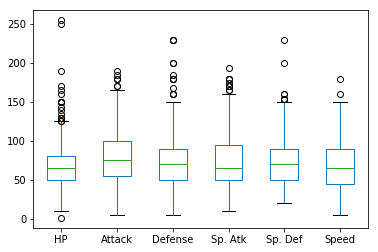

In [2]:
del(pokedex["#"])
del(pokedex["Total"])
del(pokedex["Generation"])
del(pokedex["Legendary"])
pokedex.plot.box();
print("Pokémons disponíveis:{}".format(len(pokedex)))

Nota-se que, através da análise dos atributos de ataque, defesa, velocidade, HP, ataque especial, defesa especial; podemos observar que a grande maioria dos pokémons se encontram dentro do interquantil. Podemos ver que são poucos os pokémons que estão fora da curva em cada atributo, dado que existem cerca de 800 pokémons no dataset.

## <font color = "BLUE"> Clusterização dos dados </font>

In [3]:
#Clusterização dos dados, considerando os 6 atributos do pokémon. Código baseado em "clustering_SKL.ipynb" da aula 27
dados_entrada = pokedex.loc[:,("Attack", "Defense", "Sp. Atk","Sp. Def",'Speed',"HP")]
ten_means = cluster.MiniBatchKMeans(n_clusters=20)
ten_means.fit(dados_entrada)
saida = ten_means.predict(dados_entrada)
saida

array([16,  7, 10, 10,  0,  7, 14,  2, 10, 16, 13,  1, 10,  0, 16,  7,  0,
       16,  8, 12,  0,  8,  5, 10,  0,  5,  0,  5,  0,  8,  0, 14,  6,  3,
       16,  8, 11,  0,  8, 14, 16, 17,  0,  5, 19, 19,  0,  5, 16, 13,  1,
       16, 13, 16,  7,  0,  5,  0,  5,  0, 14,  0,  5,  8, 14,  0,  8, 11,
        7,  7,  7, 10, 16, 11, 11, 16,  8, 14,  7,  5,  6,  6, 18,  8,  5,
       16,  1, 15,  7, 13,  8,  0,  5, 16, 17, 16, 11,  6, 15,  7,  7,  7,
       10,  3, 16, 17,  6,  3,  0,  5, 16,  1,  6, 13, 12,  3, 17,  6,  3,
        6, 18,  4, 13, 11, 12,  0,  7,  0,  8,  7,  5,  7,  5,  7, 14, 14,
       12, 12,  5,  0, 12, 12, 17,  0, 16, 17,  5, 12, 13, 13, 13,  6,  3,
        5,  5, 11, 10, 10, 10,  0,  8, 12,  2,  2,  2, 10, 16, 13,  3,  0,
        7, 14, 16,  8,  3, 16,  8,  0, 17,  0,  7, 16,  8,  5,  0, 17,  0,
       16, 16, 16, 13,  0, 14, 16, 16,  1,  1,  1, 16, 17,  6, 17,  0,  0,
        5,  8,  0,  1,  7, 16, 11, 10,  9, 14,  1,  7,  8, 19, 14,  6,  3,
       17,  3, 15, 15, 16

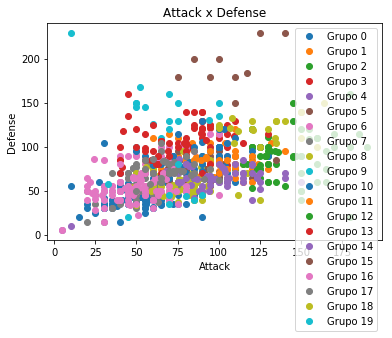

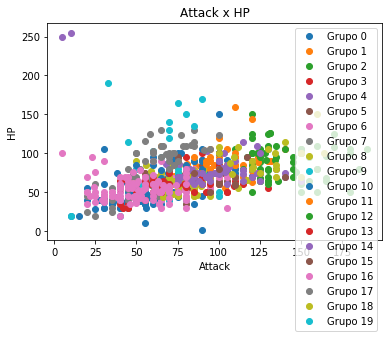

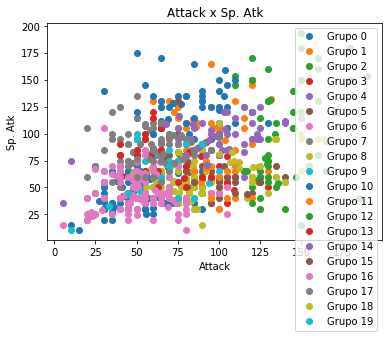

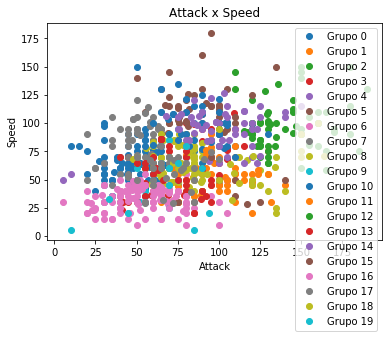

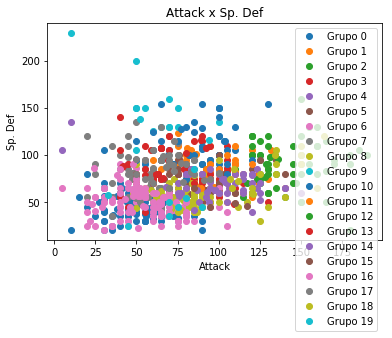

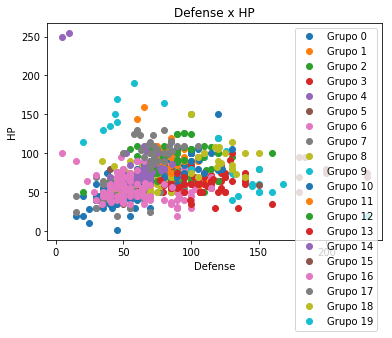

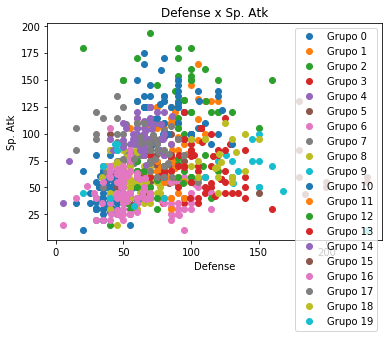

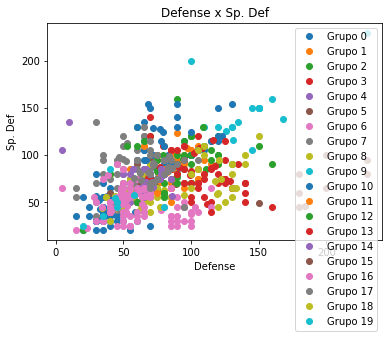

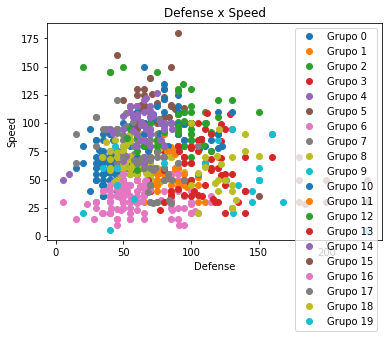

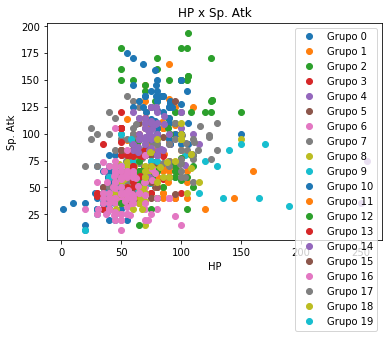

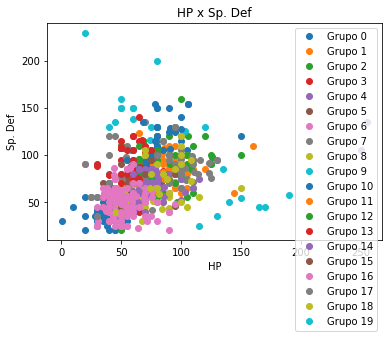

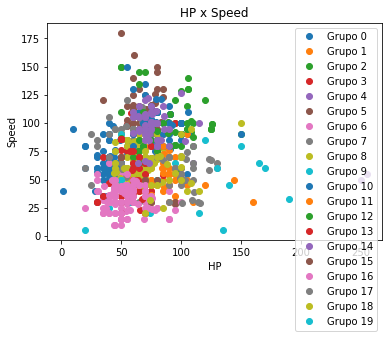

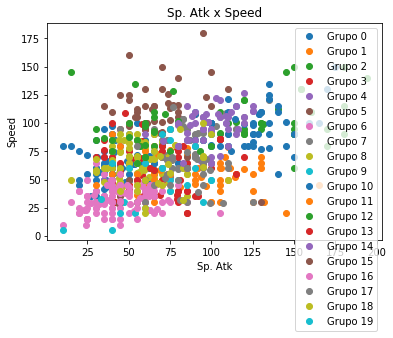

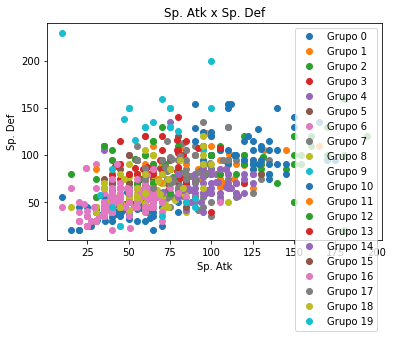

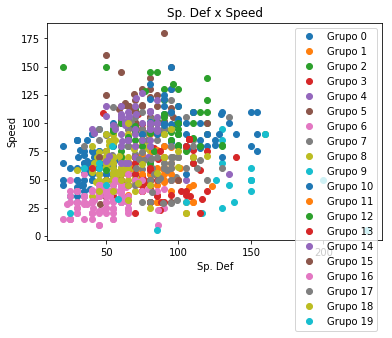

In [4]:
conjunto = dados_entrada.copy()
conjunto["saida"] = saida
pokedex['saida'] = saida

grupo0 = conjunto[conjunto.saida==0]
grupo1 = conjunto[conjunto.saida==1]
grupo2 = conjunto[conjunto.saida==2]
grupo3 = conjunto[conjunto.saida==3]
grupo4 = conjunto[conjunto.saida==4]
grupo5 = conjunto[conjunto.saida==5]
grupo6 = conjunto[conjunto.saida==6]
grupo7 = conjunto[conjunto.saida==7]
grupo8 = conjunto[conjunto.saida==8]
grupo9 = conjunto[conjunto.saida==9]
grupo10 = conjunto[conjunto.saida==10]
grupo11 = conjunto[conjunto.saida==11]
grupo12 = conjunto[conjunto.saida==12]
grupo13 = conjunto[conjunto.saida==13]
grupo14 = conjunto[conjunto.saida==14]
grupo15 = conjunto[conjunto.saida==15]
grupo16 = conjunto[conjunto.saida==16]
grupo17 = conjunto[conjunto.saida==17]
grupo18 = conjunto[conjunto.saida==18]
grupo19 = conjunto[conjunto.saida==19]
# grupo20 = conjunto[conjunto.saida==20]
# grupo21 = conjunto[conjunto.saida==21]
# grupo22 = conjunto[conjunto.saida==22]
# grupo23 = conjunto[conjunto.saida==23]
# grupo24 = conjunto[conjunto.saida==24]


#Comparar de dois a dois (combinação de 6 dois a dois)
def plota_grafico(atributo1, atributo2):
    plt.plot(grupo0["{}".format(atributo1)], grupo0["{}".format(atributo2)], "o", label='Grupo 0')
    plt.plot(grupo1["{}".format(atributo1)], grupo1["{}".format(atributo2)], "o", label='Grupo 1')
    plt.plot(grupo2["{}".format(atributo1)], grupo2["{}".format(atributo2)], "o", label='Grupo 2')
    plt.plot(grupo3["{}".format(atributo1)], grupo3["{}".format(atributo2)], "o", label='Grupo 3')
    plt.plot(grupo4["{}".format(atributo1)], grupo4["{}".format(atributo2)], "o", label='Grupo 4')
    plt.plot(grupo5["{}".format(atributo1)], grupo5["{}".format(atributo2)], "o", label='Grupo 5')
    plt.plot(grupo6["{}".format(atributo1)], grupo6["{}".format(atributo2)], "o", label='Grupo 6')
    plt.plot(grupo7["{}".format(atributo1)], grupo7["{}".format(atributo2)], "o", label='Grupo 7')
    plt.plot(grupo8["{}".format(atributo1)], grupo8["{}".format(atributo2)], "o", label='Grupo 8')
    plt.plot(grupo9["{}".format(atributo1)], grupo9["{}".format(atributo2)], "o", label='Grupo 9')
    plt.plot(grupo10["{}".format(atributo1)], grupo10["{}".format(atributo2)], "o", label='Grupo 10')
    plt.plot(grupo11["{}".format(atributo1)], grupo11["{}".format(atributo2)], "o", label='Grupo 11')
    plt.plot(grupo12["{}".format(atributo1)], grupo12["{}".format(atributo2)], "o", label='Grupo 12')
    plt.plot(grupo13["{}".format(atributo1)], grupo13["{}".format(atributo2)], "o", label='Grupo 13')
    plt.plot(grupo14["{}".format(atributo1)], grupo14["{}".format(atributo2)], "o", label='Grupo 14') 
    plt.plot(grupo15["{}".format(atributo1)], grupo15["{}".format(atributo2)], "o", label='Grupo 15')
    plt.plot(grupo16["{}".format(atributo1)], grupo16["{}".format(atributo2)], "o", label='Grupo 16')
    plt.plot(grupo17["{}".format(atributo1)], grupo17["{}".format(atributo2)], "o", label='Grupo 17')
    plt.plot(grupo18["{}".format(atributo1)], grupo18["{}".format(atributo2)], "o", label='Grupo 18')
    plt.plot(grupo19["{}".format(atributo1)], grupo19["{}".format(atributo2)], "o", label='Grupo 19')
#     plt.plot(grupo20["{}".format(atributo1)], grupo20["{}".format(atributo2)], "o", label='Grupo 20')
#     plt.plot(grupo21["{}".format(atributo1)], grupo21["{}".format(atributo2)], "o", label='Grupo 21')
#     plt.plot(grupo22["{}".format(atributo1)], grupo22["{}".format(atributo2)], "o", label='Grupo 22')
#     plt.plot(grupo23["{}".format(atributo1)], grupo23["{}".format(atributo2)], "o", label='Grupo 23')
#     plt.plot(grupo24["{}".format(atributo1)], grupo24["{}".format(atributo2)], "o", label='Grupo 24')
    
    plt.xlabel("{}".format(atributo1))
    plt.ylabel("{}".format(atributo2))
    plt.title("{} x {}".format(atributo1,atributo2))
    plt.legend()
    plt.show()
plota_grafico("Attack","Defense")
plota_grafico("Attack","HP")
plota_grafico("Attack","Sp. Atk")
plota_grafico("Attack", "Speed")
plota_grafico("Attack","Sp. Def")
plota_grafico("Defense","HP")
plota_grafico("Defense","Sp. Atk")
plota_grafico("Defense","Sp. Def")
plota_grafico("Defense","Speed")
plota_grafico("HP", "Sp. Atk")
plota_grafico("HP","Sp. Def")
plota_grafico("HP", "Speed")
plota_grafico("Sp. Atk","Speed")
plota_grafico("Sp. Atk", "Sp. Def")
plota_grafico("Sp. Def", "Speed")

Com vista na clusterização, podemos analisar os pokémons parecidos entre si de acordo com os status, apenas. 

In [8]:
pokemon = input("Digite o nome do pokémon, com letra maiúscula: ")
grupo_repetido=[]
grupo_solo=[]
saida_do_pokemon=(pokedex[pokedex.Name==pokemon].saida)
if len(saida_do_pokemon)!=0:
    for element in pokedex.saida:
        if element == int(saida_do_pokemon):
            nome_real = pokedex[pokedex["saida"]==element].Name
            grupo_repetido.append(nome_real)
    for p in grupo_repetido[0]:
        grupo_solo.append(p)
    print("Os pokémons parecidos com {} são: {}".format(pokemon, grupo_solo))
else:
    print("Esse pokémon não existe ou o nome foi digitado de forma incorreta.")

Digite o nome do pokémon, com letra maiúscula: Pikachu
Os pokémons parecidos com Pikachu são: ['Charmander', 'Caterpie', 'Weedle', 'Pidgey', 'Rattata', 'Spearow', 'Ekans', 'Pikachu', 'Nidoran♂', 'Vulpix', 'Zubat', 'Diglett', 'Meowth', 'Psyduck', 'Mankey', 'Poliwag', 'Doduo', 'Voltorb', 'Horsea', 'Goldeen', 'Magikarp', 'Ditto', 'Dratini', 'Cyndaquil', 'Hoothoot', 'Ledyba', 'Chinchou', 'Pichu', 'Natu', 'Hoppip', 'Skiploom', 'Sunkern', 'Swinub', 'Remoraid', 'Delibird', 'Houndour', 'Smeargle', 'Tyrogue', 'Treecko', 'Poochyena', 'Zigzagoon', 'Taillow', 'Wingull', 'Ralts', 'Kirlia', 'Surskit', 'Shedinja', 'Skitty', 'Meditite', 'Electrike', 'Carvanha', 'Barboach', 'Baltoy', 'Feebas', 'Shuppet', 'Snorunt', 'Luvdisc', 'Bagon', 'Chimchar', 'Starly', 'Shinx', 'Budew', 'Combee', 'Buizel', 'Glameow', 'Stunky', 'Riolu', 'Croagunk', 'Finneon', 'Snivy', 'Patrat', 'Lillipup', 'Purrloin', 'Pansage', 'Pansear', 'Panpour', 'Pidove', 'Blitzle', 'Woobat', 'Tympole', 'Venipede', 'Cottonee', 'Sandile', 'Trubb

Bom, o nosso objetivo não é identificar grupos parecidos de acordo com status, mas sim, pokémons parecidos na seguinte situação: dado um pokémon adversário, quais seriam os melhores pokémons para a batalha? Para responder tal pergunta, será necessário encontrar o ponto fraco, ponto forte e ataques sem efeitos de cada pokémon. 

## <font color="BLUE"> Identificando os ponto fracos dos pokémons </font>

In [ ]:
deck=6

Pokemons={'Fairy':[],'Grass':[],'Fire':[],'Flying':[],'Dark':[],'Ghost':[],'Psychic':[],'Bug':[],'Dragon':[],'Ice':[],\
          'Electric':[],'Poison':[],'Rock':[],'Ground':[],'Steel':[],'Normal':[],'Water':[],'Fighting':[]}

#Separação do pokémon por tipo
def ClassificaPokemon(dicionario):
    for tipo in dicionario:
        for pokemon in pokedex.Name:
            linha=pokedex[pokedex.Name==pokemon]
            if linha['Type 1'].all()==tipo or linha['Type 2'].all()==tipo:
                dicionario[tipo].append(pokemon)
ClassificaPokemon(Pokemons)

In [5]:
#Dado um pokemon, identifica-se seu tipo composto (se tiver um tipo 2, por exemplo, tipo fire e tipo fighting)
def ClassificaTipoComposto(pokemon):
    tipo1=pokedex[pokedex.Name==pokemon]['Type 1'].all()
    tipo2=pokedex[pokedex.Name==pokemon]['Type 2'].all()
    return tipo1,tipo2


#Define o ponto fraco de cada tipo de pokemon. REferencias de fraqueza baseadas no site: https://pokemondb.net/type
def PontoFracoPorTipo(tipo):
    if tipo=='Fairy':
        ponto_fraco=['Poison','Steel']
        ponto_forte=['Fighting','Bug','Dark']
        no_effect=['Dragon']
    elif tipo=='Ground':
        ponto_fraco=['Water','Grass','Ice',]
        ponto_forte=['Fighting','Bug','Dark']
        no_effect=['Electric']
    elif tipo=='Fire':
        ponto_fraco=['Water','Ground','Rock']
        ponto_forte=['Fire','Grass','Ice','Bug','Steel','Fairy']
        no_effect=['None']
    elif tipo=='Water':
        ponto_fraco=['Electric','Grass']
        ponto_forte=['Fire','Water','Steel','Ice']
        no_effect=['None']
    elif tipo=='Flying':
        ponto_fraco=['Electric','Ice','Rock']
        ponto_forte=['Grass','Fighting','Bug']
        no_effect=['Ground']
    elif tipo=='Dark':
        ponto_fraco=['Fighting','Bug','Fairy']
        ponto_forte=['Ghost','Dark']
        no_effect=['Psychic']
    elif tipo=='Ghost':
        ponto_fraco=['Ghost','Dark']
        ponto_forte=['Poison','Bug']
        no_effect=['Normal','Fighting']
    elif tipo=='Psychic':
        ponto_fraco=['Bug','Ghost','Dark']
        ponto_forte=['Fighting','Psychic']
        no_effect=['None']
    elif tipo=='Bug':
        ponto_fraco=['Fire', 'Flying','Rock']
        ponto_forte=['Grass','Fighting','Ground']
        no_effect=['None']
    elif tipo=='Ice':
        ponto_fraco=['Fighting','Fire','Rock','Steel']
        ponto_forte=['Ice']
        no_effect=['None']
    elif tipo=='Electric':
        ponto_fraco=['Ground']
        ponto_forte=['Electric','Steel']
        no_effect=['None']
    elif tipo=='Poison':
        ponto_fraco=['Psychic','Ground']
        ponto_forte=['Grass','Fighting','Poison','Bug','Fairy']
        no_effect=['None']
    elif tipo=='Rock':
        ponto_fraco=['Fighting','Ground','Water','Steel','Grass']
        ponto_forte=['Normal','Fire','Poison','Flying']
        no_effect=['None']
    elif tipo=='Grass':
        ponto_fraco=['Fire','Flying','Ice','Poison','Bug']
        ponto_forte=['Grass','Water','Electric','Ground']
        no_effect=['None']
    elif tipo=='Steel':
        ponto_fraco=['Fire','Fighting','Ground']
        ponto_forte=['Normal','Grass','Ice','Flying','Psychic','Bug','Rock','Dragon','Steel','Fairy']
        no_effect=['Poison']
    elif tipo=='Normal':
        ponto_fraco=['Fighting']
        ponto_forte=['None']
        no_effect=['Ghost']
    elif tipo=='Fighting':
        ponto_fraco=['Flying','Psychic','Fairy']
        ponto_forte=['Bug','Rock','Dark']
        no_effect=['None']
    elif tipo=='Water':
        ponto_fraco=['Grass','Electric']
        ponto_forte=['Water','Ice','Fire','Steel']
        no_effect=['None']
    else:
        ponto_fraco=['None']
        ponto_forte=['None']
        no_effect=['None']
    return ponto_fraco,ponto_forte,no_effect

In [6]:
#Dado um pokemon e seus tipos, mostra o ponto fraco
def PontoFraco(pokemon):
    tipos=ClassificaTipoComposto(pokemon)
    tipo1=tipos[0]
    tipo2=tipos[1]
    first=PontoFracoPorTipo(tipo1)
    second=PontoFracoPorTipo(tipo2)
    ponto_fraco_temporario=set(first[0]+second[0])
    ponto_fraco_real=[]
    for elemento in ponto_fraco_temporario:
        if elemento not in second[1]:
            if elemento not in second[2]:
                if elemento not in first[1]:
                    if elemento not in first[2]:
                        ponto_fraco_real.append(elemento)
    return ponto_fraco_real

In [10]:
pokemon = input("Qual seu pokémon adversário? ")
nova_tabela=pokedex.copy()
nome_do_pokemon=(pokedex[pokedex.Name==pokemon])
pokes=[]
if len(nome_do_pokemon)!=0:
    weakness=PontoFraco(pokemon)
    for pocket_monster in nova_tabela.Name:
        tipo1,tipo2=ClassificaTipoComposto(pocket_monster)
        if tipo1 in weakness or tipo2 in weakness:
            print(int(nova_tabela[nova_tabela['Name']==pocket_monster].Attack)*2)
            print(int(nova_tabela[nova_tabela['Name']==pocket_monster]["Sp. Atk"]))
            pokes.append(pocket_monster)
else:
    print("Pokémon não encontrado. Verifique se a escrita está correta.")

Qual seu pokémon adversário? Pinsir
104
60
128
80
168
109
260
130
208
159
90
90
90
35
120
50
160
70
160
135
120
31
180
61
82
50
152
81
90
30
160
65
140
70
220
100
160
30
190
45
240
55
170
65
200
80
130
58
170
35
220
60
90
30
170
30
260
45
220
55
190
100
310
65
250
60
260
95
80
90
120
115
160
55
230
65
210
60
270
70
170
95
180
125
200
125
268
100
104
60
128
80
168
109
60
36
100
76
40
40
70
55
180
70
80
80
100
70
150
95
200
30
70
35
90
45
110
55
130
75
170
85
150
35
20
10
80
70
100
80
110
65
110
65
80
80
160
40
120
80
180
110
180
140
150
70
230
90
128
45
168
65
268
95
328
95
180
90
260
110
120
70
170
85
240
110
320
130
140
100
110
30
170
50
60
55
100
85
120
80
180
50
90
45
140
40
180
50
220
60
120
65
200
105
240
145
170
85
80
40
140
70
110
95
190
55
82
61
162
81
190
40
250
70
136
72
180
45
270
110
290
120
200
50
360
150
300
150
360
180
116
58
156
78
208
104
110
30
150
40
240
50
250
30
330
65
84
42
104
47
188
94
60
30
160
80
100
60
160
90
250
105
160
10
130
92
40
60
280
55
190
125
100
120

## <font color = "BLUE"> Conclusão 